<a href="https://colab.research.google.com/github/veerkamdar007/Tensorflow_Hands-On/blob/main/02_NN_Classification_with_Tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to NN classification with Tensorflow:

Classification is where you try to classify something as one thing or the other.

A few types of Classification problems are:

* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Create data to view and fit

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf
import numpy as np
# Make 1000 eg.
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


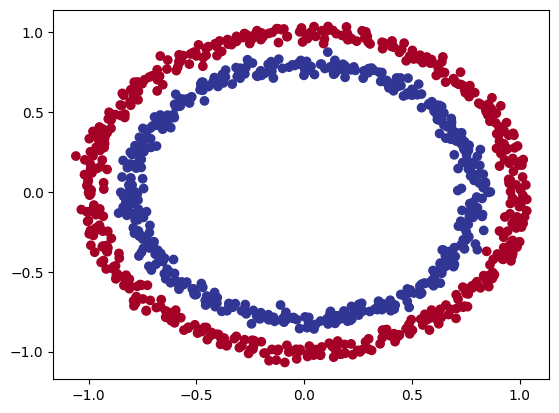

In [ ]:
# @title X0 vs X1

from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

###Input and Output Shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
# Create a model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.4091 - accuracy: 0.4610
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.8197 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


### Our model accuracy is only 50 percent from the above model,meaning that is just trail and error. Let's improve the accuracy of the model.

In [ ]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Let's add an extra layer for a higher accuracy

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y) # Our model is not good even when we increased layer

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934179663658142, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5090


[0.7005033493041992, 0.5090000033378601]

In [ ]:
model_3.predict(X) # Outut lies mostly around 0.5 while we want either 0 or 1

32/32 [==============================] - 0s 1ms/step


array([[0.47674567],
       [0.57655203],
       [0.5818314 ],
       [0.5833985 ],
       [0.43161553],
       [0.5883663 ],
       [0.5636504 ],
       [0.47060174],
       [0.48000312],
       [0.5840051 ],
       [0.52746177],
       [0.525782  ],
       [0.5725057 ],
       [0.44475394],
       [0.43893903],
       [0.45691997],
       [0.5596856 ],
       [0.4609151 ],
       [0.5658211 ],
       [0.5155345 ],
       [0.49847823],
       [0.60456485],
       [0.4577747 ],
       [0.48051882],
       [0.60509604],
       [0.5917858 ],
       [0.55331886],
       [0.44901294],
       [0.45210266],
       [0.4422198 ],
       [0.48352402],
       [0.5894064 ],
       [0.5609556 ],
       [0.4464584 ],
       [0.45826656],
       [0.61036474],
       [0.58823407],
       [0.5264647 ],
       [0.45299327],
       [0.50160456],
       [0.5107324 ],
       [0.5456043 ],
       [0.524434  ],
       [0.44330502],
       [0.538486  ],
       [0.55747527],
       [0.43876487],
       [0.545

In [ ]:
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting X
  CS231n : https://cs231n.github.io/neural-networks-case-study/
  Made with ML :
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min , x_max =  X[:,0].min() - 0.1,X[:,0].max()+0.1
  y_min,y_max =  X[:,1].min() - 0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  # Create X value (we're going to make predictions on these)

  x_in = np.c_[xx.ravel(),yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our prefiction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classification


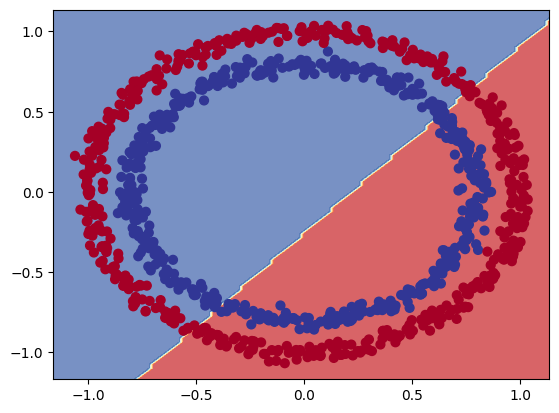

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
  x_min , x_max =  X[:,0].min() - 0.1,X[:,0].max()+0.1
  y_min,y_max =  X[:,1].min() - 0.1,X[:,1].max()+0.1

  x_min,x_max,y_min,y_max


(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
# Let's seee if our model can be used for regression problem

tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y=X+10

# Train-test split
X_reg_train =np.expand_dims(X_regression[:150],axis=1)
X_reg_test = np.expand_dims(X_regression[150:],axis=1)

y_reg_train = np.expand_dims(y_regression[:150],axis=1)
y_reg_test = np.expand_dims(y_regression[150:],axis=1)

# Fit our model to the regression data
#model_3.fit(X_reg_train,y_reg_train,epochs=100)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["mae"])

model_4.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 454.6154 - mae: 454.6154
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 339.2746 - mae: 339.2746
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 229.4585 - mae: 229.4585
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 116.4520 - mae: 116.4520
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 49.6874 - mae: 49.6874
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 80.3848 - mae: 80.3848
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 66.9948 - mae: 66.9948
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 43.4413 - mae: 43.4413
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 48.9240 - mae: 48.9240
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.7272 - mae: 41.7272
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


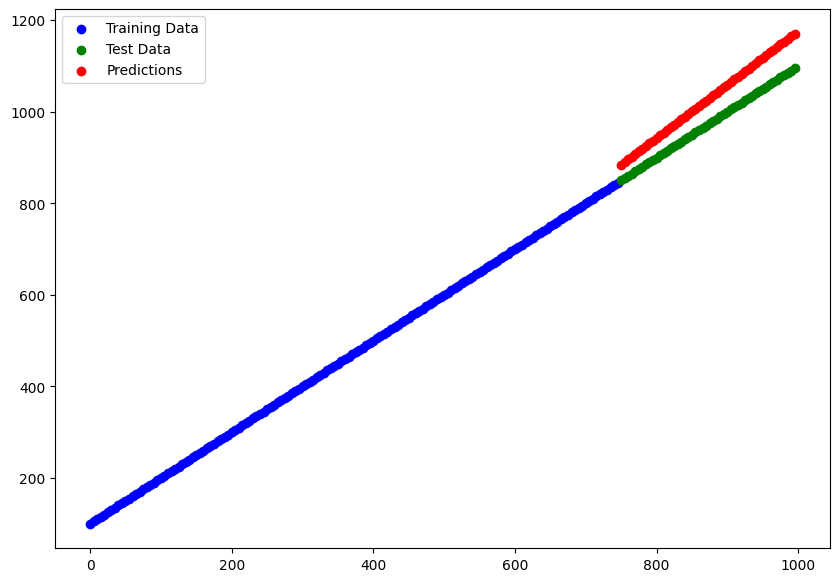

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test Data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend();


### The main problem with using the same model for classification problem is the data distribution which is not linea whilst for regression problem the data distributed is a straight line.

* Hence the missing piece is: **Non-Linearity**

In [ ]:
# Model using non-linear activations
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4950
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4920
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4780
Epoch 11/

In [ ]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.6480


[0.6083212494850159, 0.6480000019073486]

313/313 [==============================] - 1s 2ms/step
doing binary classification


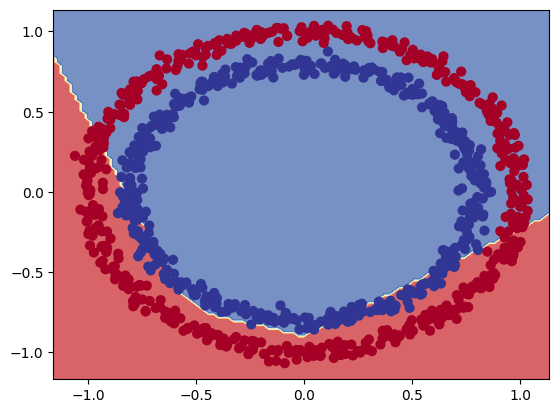

In [ ]:
plot_decision_boundary(model_5,X,y)

### The combination of linear and non linear functions is one of the key fundamentals of NN

In [ ]:
# Create a toy tensor (Similar to the data we passed into our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

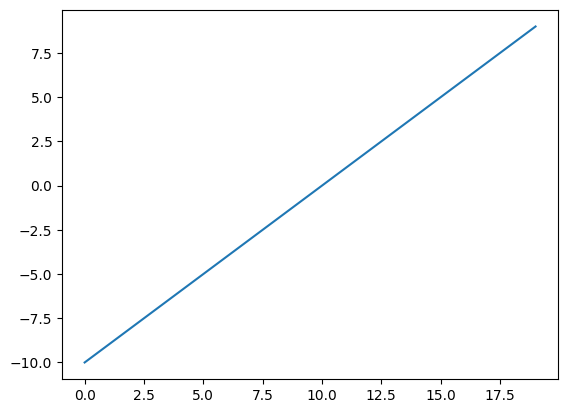

In [ ]:
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))


In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

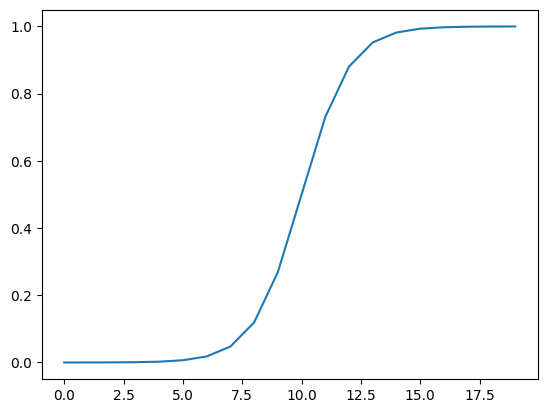

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
# ReLU funcion:

def ReLU(x):
  return tf.maximum(0,x)


ReLU(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

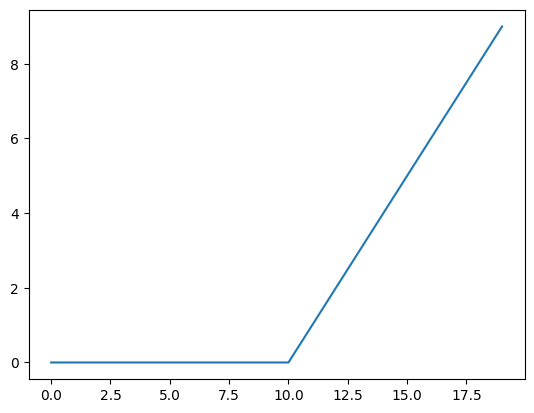

In [ ]:
plt.plot(ReLU(A));

# Evaluating and improving our classification

In [ ]:
# Let's create a train test split using our original data
len(X)

1000

In [ ]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape , X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])

history1 = model_6.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7017 - accuracy: 0.4988
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5050
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5113
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5263
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5325
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5325
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5362
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5400
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5500
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5537
Epoch 11/25
25/25 [